In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("F:\Python\Data\sample_data_test.csv")
df.head()
df.shape
df.info()

df.columns
df.drop(['    cid_no', '    channel_id', '    transaction_id','    transaction_datetime','    product'],axis = 1,inplace= True)

df.isnull().sum()
df.columns

df['    minor'].value_counts()


df['    minor'].fillna('N',inplace = True)

df.drop(['    date_of_birth'],axis =1 , inplace = True)

df['    sex'].value_counts()


df.drop(['    educational_status','    marital_status','    income'],axis = 1, inplace = True)

df.drop(['    sex'],axis = 1, inplace = True)

df.info()

df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 17 columns):
    cid_no                  2653 non-null object
    channel_id              2653 non-null object
    transaction_id          2653 non-null object
    transaction_datetime    2653 non-null object
    transaction_amount      2653 non-null float64
    product                 0 non-null float64
    service_category        2653 non-null object
    transaction_location    2653 non-null int64
    transaction_type        2653 non-null object
    customer_type           2653 non-null object
    sex                     816 non-null object
    date_of_birth           778 non-null object
    educational_status      710 non-null object
    income                  637 non-null object
    minor                   1626 non-null object
    marital_status          728 non-null object
    dependents              2653 non-null int64
dtypes: float64(2), int64(2), object(13)
memory usage: 352.4+ KB
<cl

,transaction_amount,service_category,transaction_location,transaction_type,customer_type,minor,dependents
0,209232.75,REMITTANCE,19,FINANCIAL,I,N,8
1,275000.00,REMITTANCE,3,FINANCIAL,I,N,2
2,240000.00,CASH DEPOSIT,3,FINANCIAL,I,N,2
3,650000.00,CASH DEPOSIT,45,FINANCIAL,C,N,0
4,300000.00,CASH DEPOSIT,14,FINANCIAL,C,N,0
5,916500.00,CASH DEPOSIT,8,FINANCIAL,C,N,0
6,256050.00,REMITTANCE,71,FINANCIAL,I,N,2
7,992515.00,CASH DEPOSIT,47,FINANCIAL,C,N,0
8,386000.00,CASH DEPOSIT,91,FINANCIAL,C,N,0
9,900000.00,CASH DEPOSIT,91,FINANCIAL,C,N,0


In [5]:
#As this values are in categorical converting into numerical
la=LabelEncoder()

In [6]:


df.info()


df['    transaction_type'] = la.fit_transform(df['    transaction_type'])

df['    customer_type'] = la.fit_transform(df['    customer_type'])

df[ '    minor'] = la.fit_transform(df[ '    minor'])


df[ '    dependents'] = la.fit_transform(df[  '    dependents'])
df[ '    service_category'] = la.fit_transform(df[  '    service_category'])
df[ '    transaction_amount'] = la.fit_transform(df[  '    transaction_amount'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 7 columns):
    transaction_amount      2653 non-null float64
    service_category        2653 non-null object
    transaction_location    2653 non-null int64
    transaction_type        2653 non-null object
    customer_type           2653 non-null object
    minor                   2653 non-null object
    dependents              2653 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 145.2+ KB


In [7]:
df.head()

,transaction_amount,service_category,transaction_location,transaction_type,customer_type,minor,dependents
0,79,2,19,0,2,0,8
1,400,2,3,0,2,0,2
2,260,0,3,0,2,0,2
3,957,0,45,0,1,0,0
4,497,0,14,0,1,0,0


In [8]:
kmeans=KMeans(n_clusters=4)

In [9]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
clusters=kmeans.cluster_centers_

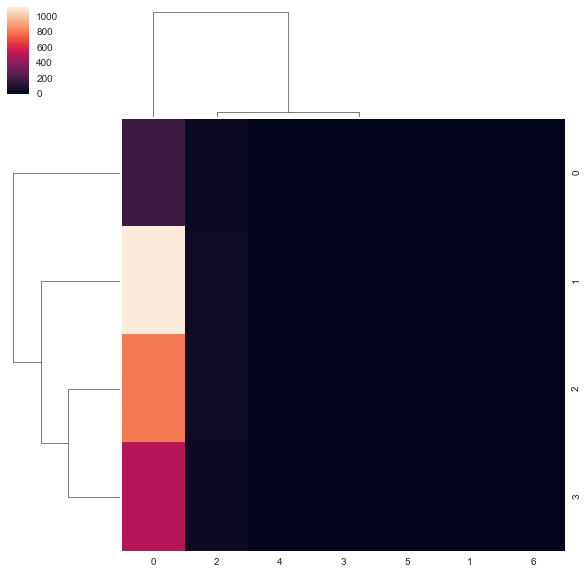

In [11]:
sns.clustermap(clusters)
plt.show()

In [12]:
df1=scale(df)
X=df.drop(['    customer_type'],1)
y=df['    customer_type']
df1[0:10,]

array([[-1.59036442,  1.98483841, -0.67438253,  0.        ,  1.41031929,
        -0.12214607,  6.71431144],
       [-0.70001473,  1.98483841, -1.23518554,  0.        ,  1.41031929,
        -0.12214607,  1.4256574 ],
       [-1.08832924, -0.52566281, -1.23518554,  0.        ,  1.41031929,
        -0.12214607,  1.4256574 ],
       [ 0.84492227, -0.52566281,  0.23692236,  0.        , -0.37138408,
        -0.12214607, -0.33722728],
       [-0.43096825, -0.52566281, -0.84963347,  0.        , -0.37138408,
        -0.12214607, -0.33722728],
       [ 1.13893182, -0.52566281, -1.0599346 ,  0.        , -0.37138408,
        -0.12214607, -0.33722728],
       [-0.93300344,  1.98483841,  1.14822726,  0.        ,  1.41031929,
        -0.12214607,  1.4256574 ],
       [ 1.21104737, -0.52566281,  0.30702274,  0.        , -0.37138408,
        -0.12214607, -0.33722728],
       [ 0.15982453, -0.52566281,  1.84923102,  0.        , -0.37138408,
        -0.12214607, -0.33722728],
       [ 1.1195161 , -0.5256

In [13]:
clustering = KMeans(n_clusters = 4,random_state = 5)

In [14]:
clustering.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [15]:
df1_d=pd.DataFrame(df)

In [16]:
df.columns = ['transaction_amount','service_category','transaction_location','transaction_type','customer_type','minor','dependents']

In [17]:
y.columns = ['Target']

In [18]:
color_theme = np.array(['purple','lightsalmon','lightgreen','lightblue'])
marker_style=np.array(['^','*','^','*'])

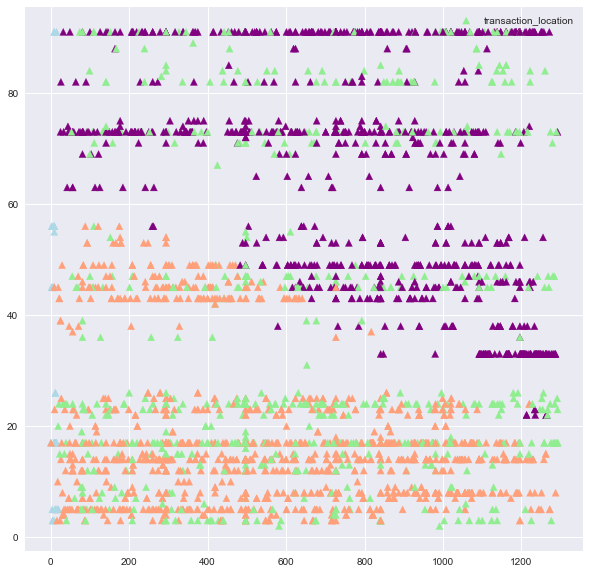

In [20]:
#In this plot we ca see that variation of tra saction amount wrt to transaction_location
plt.figure(figsize = (10,10))
plt.scatter(x=df1_d.transaction_amount,y=df1_d.transaction_location,color=color_theme[clustering.labels_],marker='^',s=50)
plt.legend()
#plt.scatter(x=df1_d.transaction_location,y=df1_d.transaction_amount,color='darkgray',marker='*',s=20)
plt.show()
